<a href="https://colab.research.google.com/github/jecs89/MicroGridDataScience/blob/main/MicrogridsDataScienceSignalProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prueba para Paper de Data Science

In [ ]:
#importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#importando archivos
recursos2=pd.read_csv('/content/Recursos2.csv', delimiter=',')
recursos1=pd.read_csv('/content/Recursos1.csv', delimiter=',')
operacion1 = pd.read_csv('/content/Operacion.csv', delimiter=',')
operacion2 = pd.read_csv('/content/Operacion2.csv', delimiter=',')

In [ ]:
recursos1['CH1Avg'].describe()

count    1.020400e+04
mean     4.000000e-01
std      6.406301e-14
min      4.000000e-01
25%      4.000000e-01
50%      4.000000e-01
75%      4.000000e-01
max      4.000000e-01
Name: CH1Avg, dtype: float64

In [ ]:
recursos2[0:10000].describe()


,CH1Avg,CH1SD,CH1Max,CH1Min,CH2Avg,CH2SD,CH2Max,CH2Min,CH3Avg,CH3SD,CH3Max,CH3Min,CH4Avg,CH4SD,CH4Max,CH4Min,CH5Avg,CH5SD,CH5Max,CH5Min,CH6Avg,CH6SD,CH6Max,CH6Min,CH7Avg,CH7SD,CH7Max,CH7Min,CH8Avg,CH8SD,CH8Max,CH8Min,CH9Avg,CH9SD,CH9Max,CH9Min,CH10Avg,CH10SD,CH10Max,CH10Min,CH11Avg,CH11SD,CH11Max,CH11Min,CH12Avg,CH12SD,CH12Max,CH12Min,CH13Avg,CH13SD,CH13Max,CH13Min,CH14Avg,CH14SD,CH14Max,CH14Min,CH15Avg,CH15SD,CH15Max,CH15Min
count,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,10000.00000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.0,10000.0,0.0,0.0,0.0,0.0,10000.00000,10000.000000,10000.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04
mean,4.000000e-01,0.0,4.000000e-01,4.000000e-01,8.63314,0.99832,11.335790,5.360620,4.000000e-01,0.0,4.000000e-01,4.000000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.423100,25.164400,0.0,0.0,252.225000,0.138400,0.0,0.0,NaN,NaN,NaN,NaN,245.89853,7.857310,260.110900,229.327360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
std,6.350793e-14,0.0,6.350793e-14,6.350793e-14,2.85838,0.37394,3.625655,2.137826,6.350793e-14,0.0,6.350793e-14,6.350793e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.004841,13.883596,0.0,0.0,0.931054,0.432278,0.0,0.0,NaN,NaN,NaN,NaN,316.54474,20.288649,329.055575,304.780578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.350793e-14,0.0,6.350793e-14,6.350793e-14,6.350793e-14,0.0,6.350793e-14,6.350793e-14,6.350793e-14,0.0,6.350793e-14,6.350793e-14
min,4.000000e-01,0.0,4.000000e-01,4.000000e-01,0.40000,0.00000,0.400000,0.400000,4.000000e-01,0.0,4.000000e-01,4.000000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,252.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
25%,4.000000e-01,0.0,4.000000e-01,4.000000e-01,7.30000,0.80000,9.400000,4.200000,4.000000e-01,0.0,4.000000e-01,4.000000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,15.000000,0.0,0.0,252.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
50%,4.000000e-01,0.0,4.000000e-01,4.000000e-01,9.00000,1.00000,12.100000,5.700000,4.000000e-01,0.0,4.000000e-01,4.000000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,23.000000,0.0,0.0,252.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,16.95000,1.700000,21.000000,12.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
75%,4.000000e-01,0.0,4.000000e-01,4.000000e-01,10.52500,1.20000,14.300000,6.500000,4.000000e-01,0.0,4.000000e-01,4.000000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,33.000000,0.0,0.0,252.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,522.17500,8.300000,563.900000,465.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
max,4.000000e-01,0.0,4.000000e-01,4.000000e-01,15.60000,5.10000,20.900000,11.100000,4.000000e-01,0.0,4.000000e-01,4.000000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358.000000,98.000000,0.0,0.0,257.000000,2.000000,0.0,0.0,NaN,NaN,NaN,NaN,1083.00000,290.500000,1220.000000,938.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0,4.000000e-01,4.000000e-01,4.000000e-01,0.0

In [ ]:
operacion1.describe()

,Uso [kW],Generación [kW],P Bat Out [A],P Bat IN [A],Potencia AC (Consumo)+ [kW],Potencia AC (Consumo)* [kVA],Tensión AC (Inversor) [V],Tensión DC (Banco de baterías) [V],Corriente consumo [A],Corriente PV [A],Corriente Bat OUT [A],Corriente Bat IN [A],Corriente T1 [A],Potencia Bat OUT+ [kW],Potencia Bat OUT- [kW],Potencia Bat IN+ [kW],Potencia Bat IN- [kW],Corriente disipación T1 [A]
count,20007.000000,20007.0,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000
mean,1.081991,0.0,21.768561,22.834638,1.081991,1.245085,177.735278,50.897476,5.423133,22.600336,21.768561,22.834638,22.471370,1.191057,0.078454,1.209930,0.045731,23.127098
std,0.674302,0.0,12.178904,10.507967,0.674302,0.782041,95.893559,3.124307,3.387951,9.474016,12.178904,10.507967,9.068094,0.315755,0.330352,0.270868,0.365232,6.604677
min,0.000000,0.0,-60.504121,-106.868014,0.000000,0.000000,0.000000,41.090983,0.030225,-72.202389,-60.504121,-106.868014,-27.692979,0.000000,0.000000,0.000000,0.000000,-17.005545
25%,0.740963,0.0,24.967491,24.981367,0.740963,0.838073,229.788737,48.903219,3.640697,24.987689,24.967491,24.981367,24.973014,1.211607,0.000000,1.211470,0.000000,24.978927
50%,1.229042,0.0,24.969871,24.982391,1.229042,1.404902,229.952422,50.517344,6.108410,24.988574,24.969871,24.982391,24.974150,1.260652,0.000000,1.260890,0.000000,24.980229
75%,1.564528,0.0,24.971198,24.984015,1.564528,1.805712,230.043151,54.041226,7.851990,24.991024,24.971198,24.984015,24.974748,1.347391,0.000000,1.347882,0.000000,24.981065
max,2.839090,0.0,24.974556,24.988778,2.839090,3.177465,265.279427,57.470918,13.819518,24.993828,24.974556,24.988778,24.977542,1.442088,3.075692,1.442975,5.742005,24.984548


In [ ]:
operacion2




,Fecha y hora,AC load,Tensión bat
0,21/06/19 18:20,0.00000,50.38224
1,21/06/19 18:19,0.00000,50.60237
2,21/06/19 18:18,0.00000,50.47930
3,21/06/19 18:17,0.00000,50.57927
4,21/06/19 18:16,0.00000,50.57785
...,...,...,...
264617,20/12/18 00:03,0.00055,0.02660
264618,20/12/18 00:02,0.00057,0.02658
264619,20/12/18 00:01,0.00055,0.02660
264620,--,0.00055,0.02658


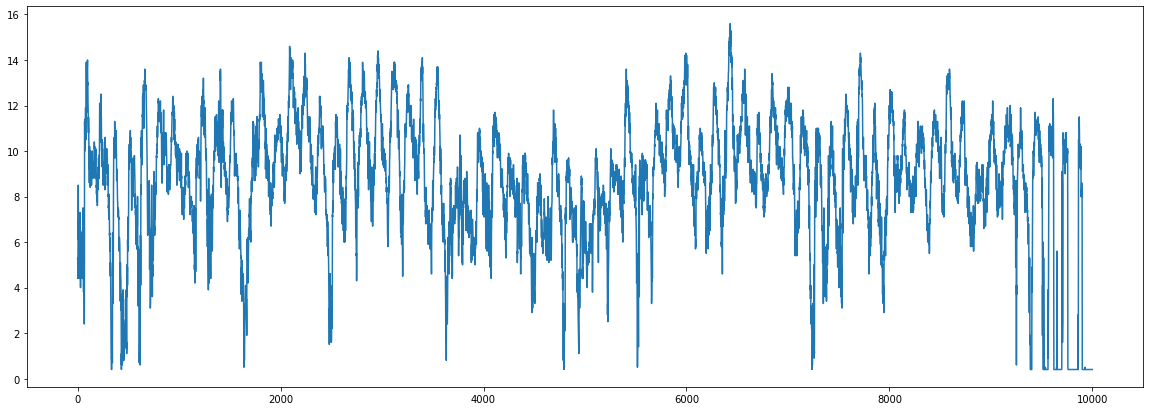

In [ ]:
#WindSpeed Recurso 2

fig = plt.figure(figsize=(20,7))
plt.plot(range(10000), recursos2['CH2Avg'].iloc[0:10000].values)



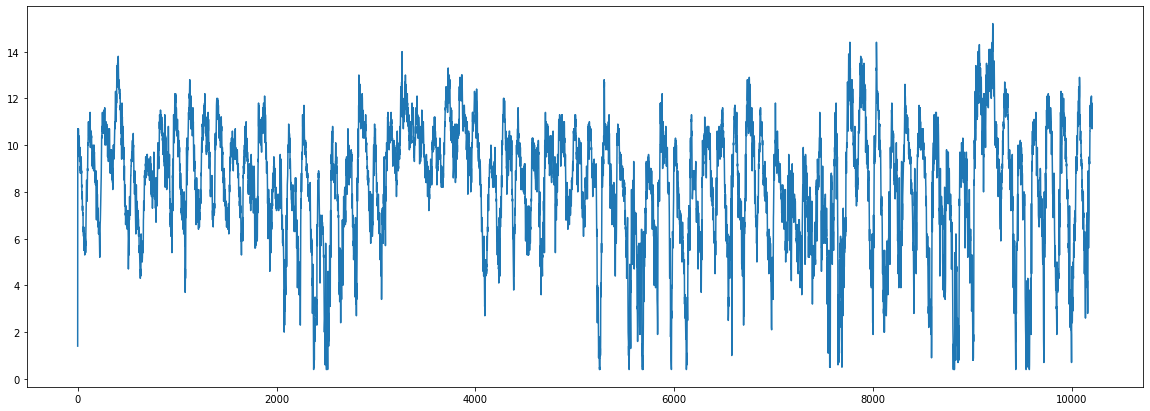

In [ ]:
#WindSpeed Recurso1
fig = plt.figure(figsize=(20,7))
plt.plot(range(recursos1.shape[0]), recursos1['CH2Avg'].values)


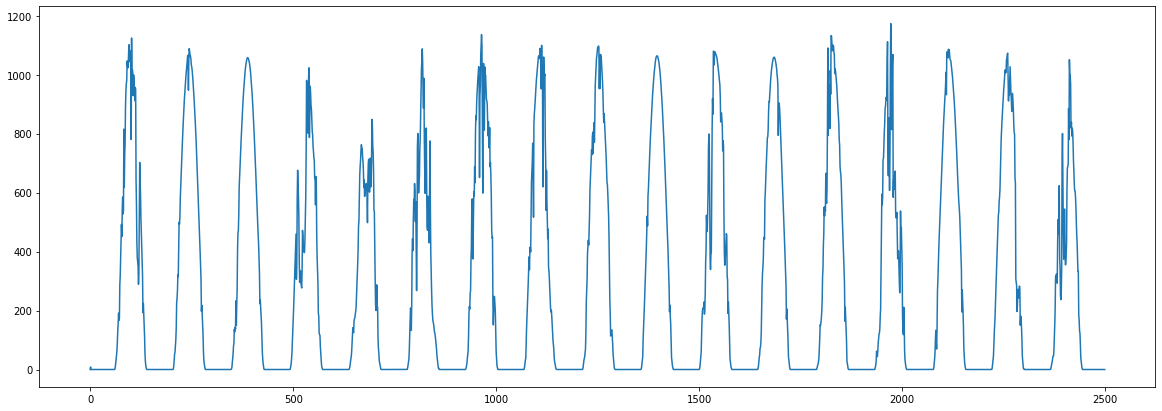

In [154]:
#SolarIrradiance Recurso1
fig = plt.figure(figsize=(20,7))
plt.plot(range(recursos1[0:2500].shape[0]), recursos1['CH9Avg'][0:2500].values)


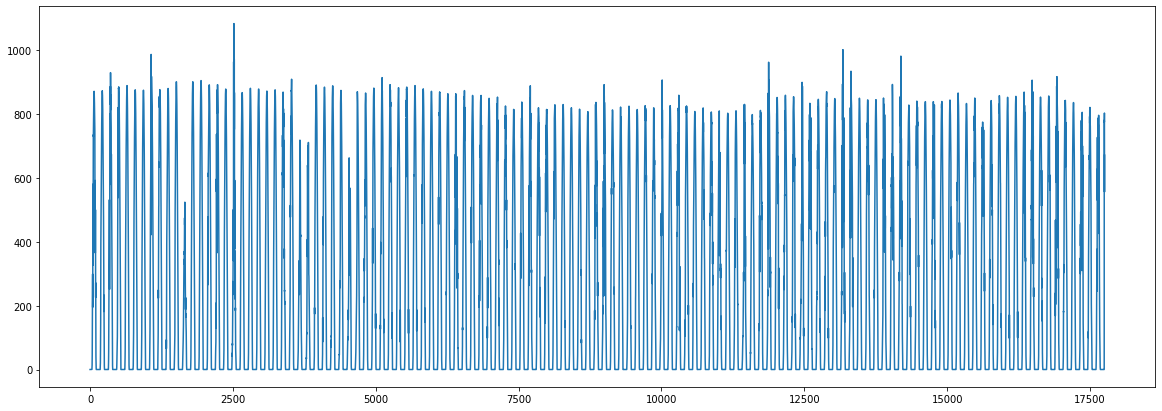

In [ ]:
#SolarIrradiance Recurso2
fig = plt.figure(figsize=(20,7))
plt.plot(range(recursos2.shape[0]), recursos2['CH10Avg'].values)


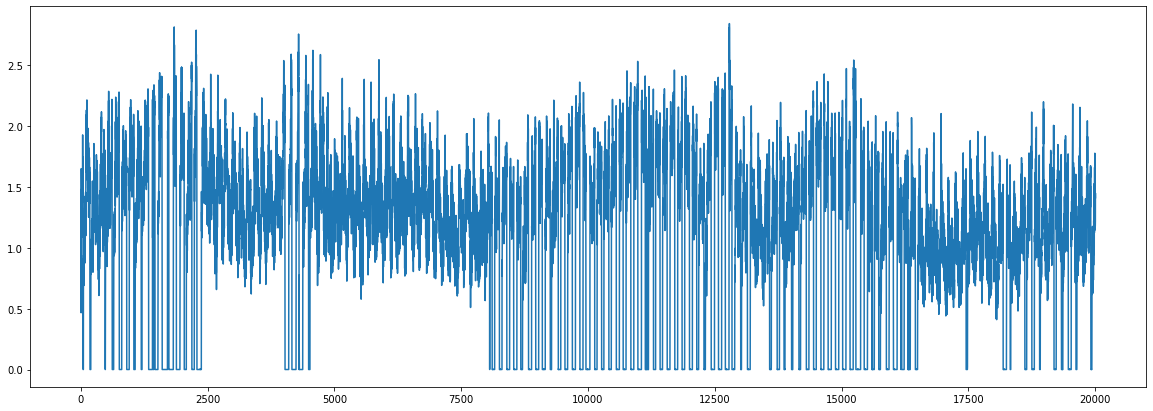

In [ ]:
#Demanda Operacion1
fig = plt.figure(figsize=(20,7))
plt.plot(range(operacion1.shape[0]), operacion1['Uso [kW]'].values)


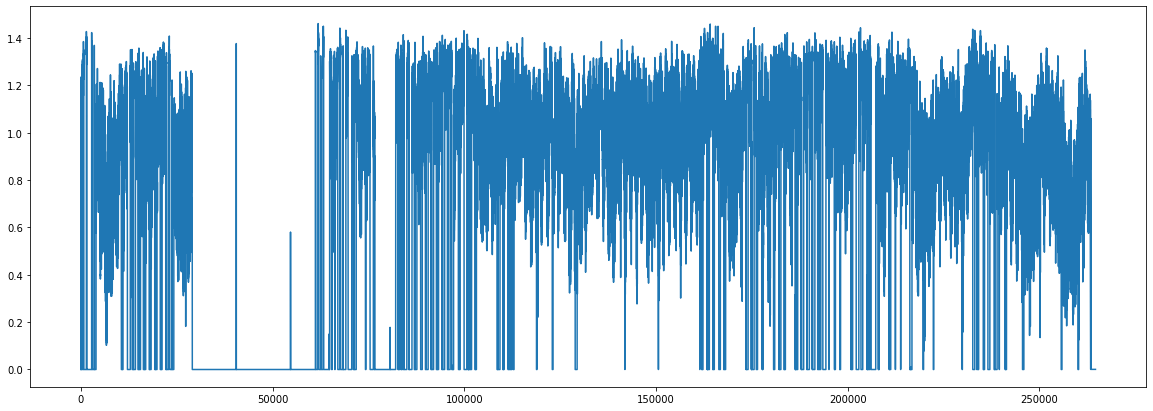

In [ ]:
#Demanda Operacion2
fig = plt.figure(figsize=(20,7))
plt.plot(range(operacion2.shape[0]), operacion2['AC load'].values)

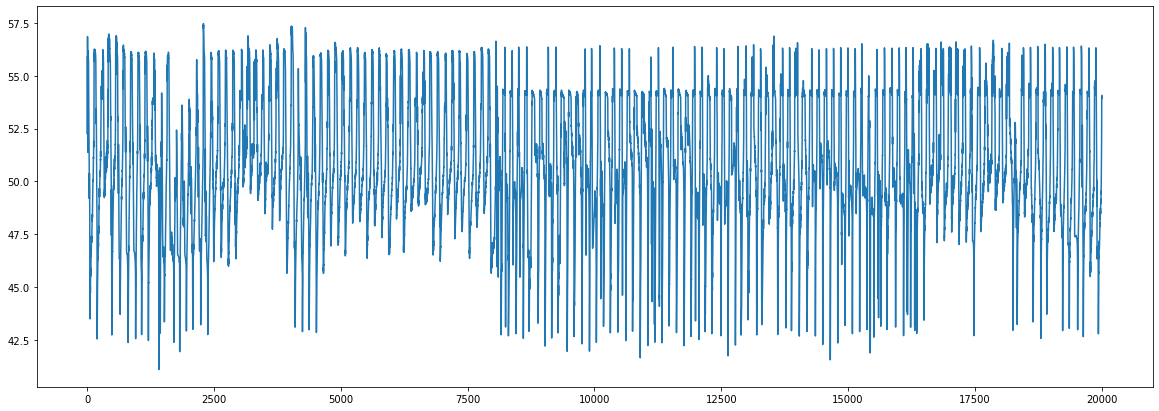

In [ ]:
#Tension1
fig = plt.figure(figsize=(20,7))
plt.plot(range(operacion1.shape[0]), operacion1['Tensión DC (Banco de baterías) [V]'].values)


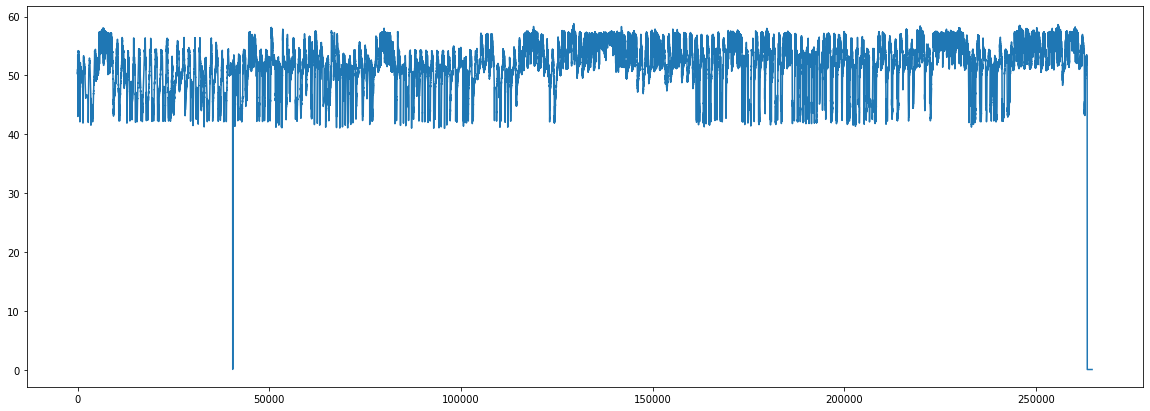

In [ ]:
#Tension2
fig = plt.figure(figsize=(20,7))
plt.plot(range(operacion2.shape[0]), operacion2['Tensión bat'].values)

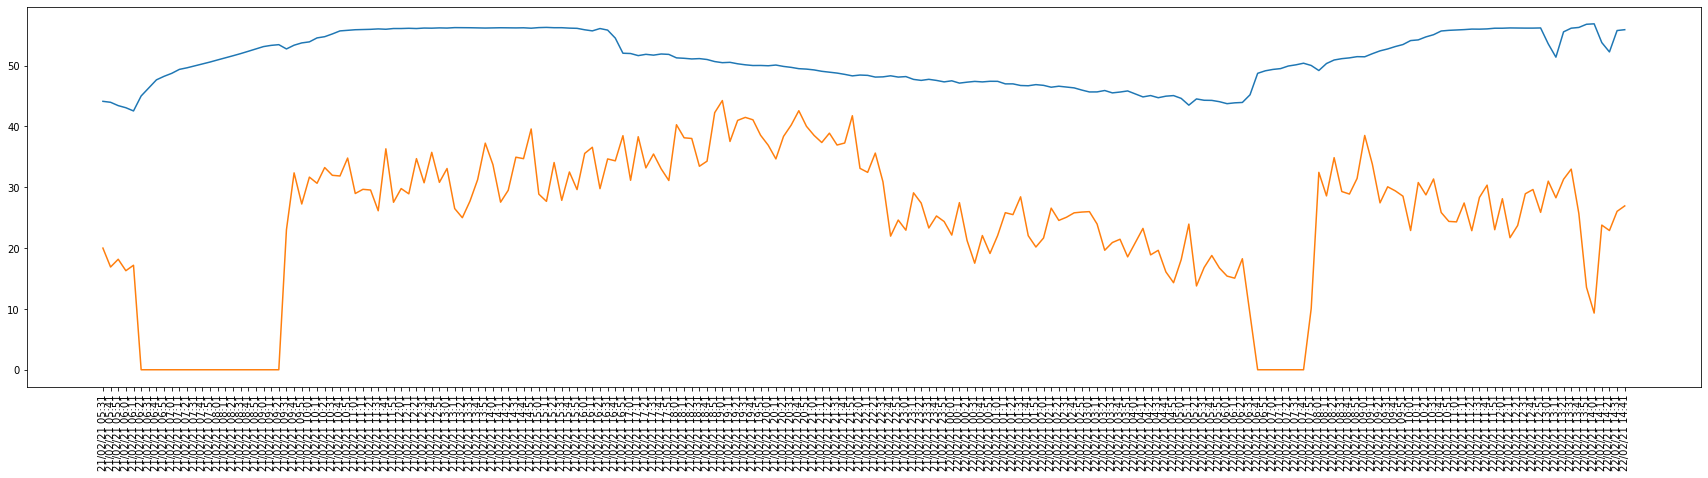

In [ ]:
#OperacionVStension
fig = plt.figure(figsize=(30,7))
rows_selected = operacion1['Uso [kW]'].iloc[0:200]
operacion1['Tensión DC (Banco de baterías) [V]'].iloc[0:200].plot()
plt.plot(rows_selected.values*20)
plt.xticks(range(operacion1['Fecha y hora'].iloc[0:200].values.shape[0]), operacion1['Fecha y hora'].iloc[0:200].values, rotation=90)
# plt.yscale('log')
plt.gca().invert_xaxis()

plt.show()


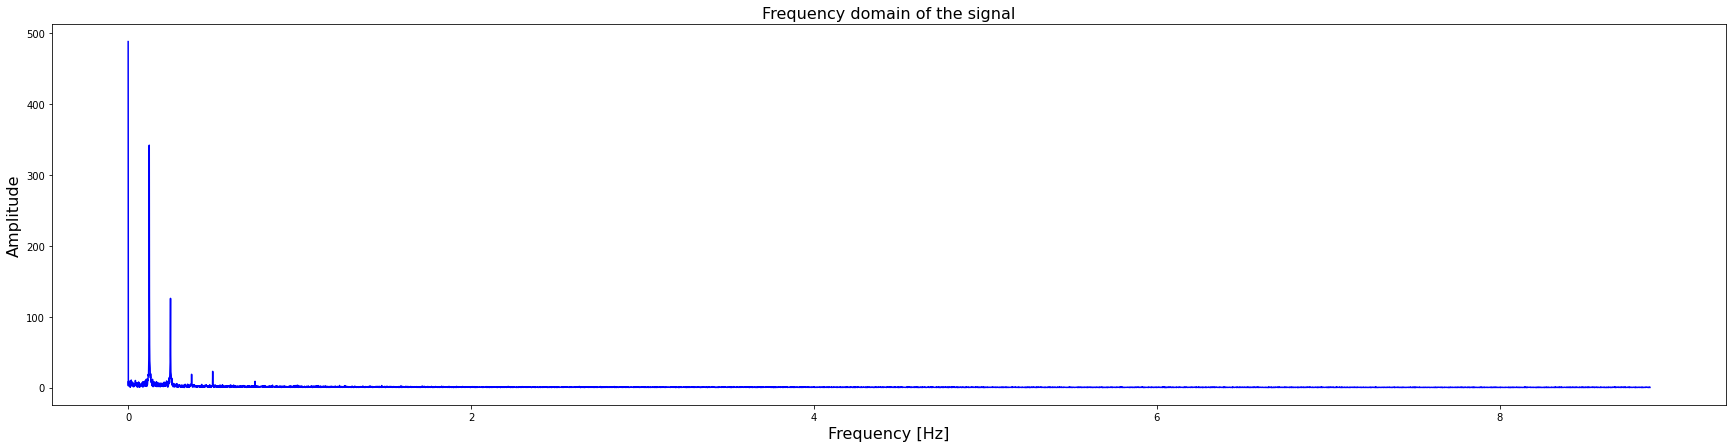

In [ ]:
#FFT
from scipy.fftpack import fft

fig = plt.figure(figsize=(30,7))

 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 177
N = 17755
T = t_n / N
f_s = 1/T
 
f_values, fft_values = get_fft_values(recursos2['CH10Avg'].values, T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

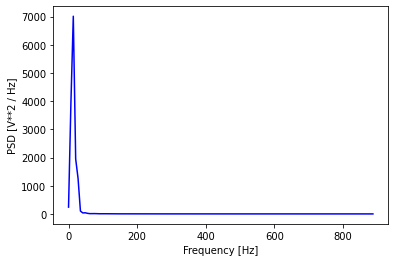

In [ ]:
#PSD 

from scipy.signal import welch
 
def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values
 
 
t_n = 10
N = 17755
T = t_n / N
f_s = 1/T
 
f_values, psd_values = get_psd_values(recursos2['CH10Avg'], T, N, f_s)
 
plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.show()

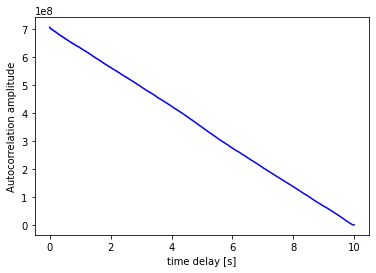

In [ ]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values
 
t_n = 10
N = 264622
T = t_n / N
f_s = 1/T
 
t_values, autocorr_values = get_autocorr_values( operacion2['Tensión bat'], T, N, f_s)
 
plt.plot(t_values, autocorr_values, linestyle='-', color='blue')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
plt.show()